# Spotify Dataset Music Reccomendation

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

### Data Loading

In [2]:
data = pd.read_csv("data.csv")

loading in our data from the data csv file

In [3]:
data.head()

acousticness                    artists  danceability  duration_ms  energy  \
0      0.991000            ['Mamie Smith']         0.598       168333   0.224   
1      0.643000  ["Screamin' Jay Hawkins"]         0.852       150200   0.517   
2      0.993000            ['Mamie Smith']         0.647       163827   0.186   
3      0.000173        ['Oscar Velazquez']         0.730       422087   0.798   
4      0.295000                   ['Mixe']         0.704       165224   0.707   

   explicit                      id  instrumentalness  key  liveness  \
0         0  0cS0A1fUEUd1EW3FcF8AEI          0.000522    5    0.3790   
1         0  0hbkKFIJm7Z05H8Zl9w30f          0.026400    5    0.0809   
2         0  11m7laMUgmOKqI3oYzuhne          0.000018    0    0.5190   
3         0  19Lc5SfJJ5O1oaxY0fpwfh          0.801000    2    0.1280   
4         1  2hJjbsLCytGsnAHfdsLejp          0.000246   10    0.4020   

   loudness  mode                                               name  \
0   -12.628     0                           Keep A Song In Your Soul   
1    -7.261     0                               I Put A Spell On You   
2   -12.098     1                                       Golfing Papa   
3    -7.311     1  True House Music - Xavier Santos & Carlos Gomi...   
4    -6.036     0                                          Xuniverxe   

   popularity release_date  speechiness    tempo  valence  year  
0          12         1920       0.0936  149.976   0.6340  1920  
1           7   1920-01-05       0.0534   86.889   0.9500  1920  
2           4         1920       0.1740   97.600   0.6890  1920  
3          17   1920-01-01       0.0425  127.997   0.0422  1920  
4           2   1920-10-01       0.0768  122.076   0.2990  1920

getting a quick preview of the data to check the rows and columns as well as the formmatting of the data

Checking data's shape

In [4]:
data.shape

(174389, 19)

### Null values

checking if the data has any null values

In [5]:
data.isna().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

## Correlation

#### Pearson Correlation

the pearson correlation is a measure of linear correlation between two sets of data. It is the covariance of two variables, divided by the product of their standard deviations

by using a heatmap we can use it to find the correlations between variables. The more the variables get closer to "1.0" the closer the variables correlate. energy and loudness have a correlation of .78 which means its a strong correlation

In [39]:
viz_data = data.drop(columns=['id', 'name', 'artists', 'release_date', 'year'])
newviz_data = data.drop(columns=['id', 'name', 'artists', 'release_date', 'year','duration_ms'])

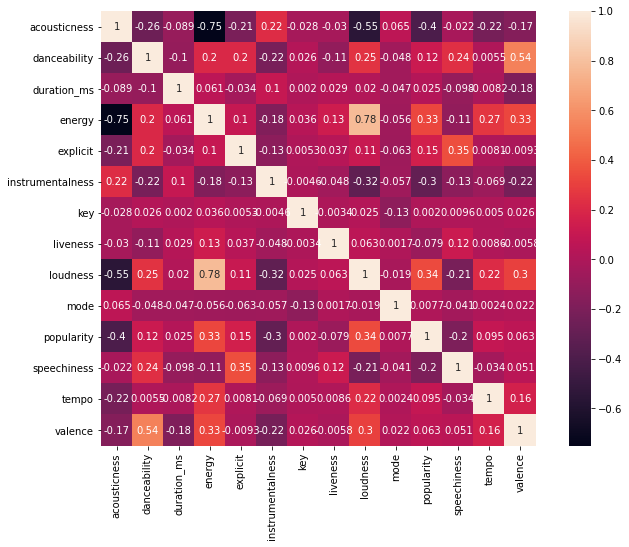

In [7]:
plt.subplots(figsize=(12, 8))
sns.heatmap(viz_data.corr(), annot=True, square=True)
plt.show()

<AxesSubplot:>

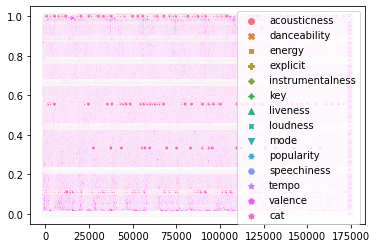

In [40]:
sns.scatterplot(data = newviz_data)

### Normalizing columns

In [8]:
data.head(2)

acousticness                    artists  danceability  duration_ms  energy  \
0         0.991            ['Mamie Smith']         0.598       168333   0.224   
1         0.643  ["Screamin' Jay Hawkins"]         0.852       150200   0.517   

   explicit                      id  instrumentalness  key  liveness  \
0         0  0cS0A1fUEUd1EW3FcF8AEI          0.000522    5    0.3790   
1         0  0hbkKFIJm7Z05H8Zl9w30f          0.026400    5    0.0809   

   loudness  mode                      name  popularity release_date  \
0   -12.628     0  Keep A Song In Your Soul          12         1920   
1    -7.261     0      I Put A Spell On You           7   1920-01-05   

   speechiness    tempo  valence  year  
0       0.0936  149.976    0.634  1920  
1       0.0534   86.889    0.950  1920

now we will begin to normalize and organize the dataset

In [9]:
def normalize_column(col):
    max_d = data[col].max()
    min_d = data[col].min()
    data[col] = (data[col] - min_d)/(max_d - min_d)

Now, we get all the columns and normalize them.
we make a method to normalize a column that obtains the column, finds the minumum and maximum value and obtain the data[col] variable

In [10]:
num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = data.select_dtypes(include=num_types)
        
for col in num.columns:
    normalize_column(col)

now for every column in the dataset, we will run it through the normalize_column function and convert it

In [11]:
data.head(3)

acousticness                    artists  danceability  duration_ms  energy  \
0      0.994980            ['Mamie Smith']      0.605263     0.030637   0.224   
1      0.645582  ["Screamin' Jay Hawkins"]      0.862348     0.027237   0.517   
2      0.996988            ['Mamie Smith']      0.654858     0.029792   0.186   

   explicit                      id  instrumentalness       key  liveness  \
0       0.0  0cS0A1fUEUd1EW3FcF8AEI          0.000522  0.454545    0.3790   
1       0.0  0hbkKFIJm7Z05H8Zl9w30f          0.026400  0.454545    0.0809   
2       0.0  11m7laMUgmOKqI3oYzuhne          0.000018  0.000000    0.5190   

   loudness  mode                      name  popularity release_date  \
0  0.741868   0.0  Keep A Song In Your Soul        0.12         1920   
1  0.825918   0.0      I Put A Spell On You        0.07   1920-01-05   
2  0.750168   1.0              Golfing Papa        0.04         1920   

   speechiness     tempo  valence  year  
0     0.096395  0.615900    0.634   0.0  
1     0.054995  0.356823    0.950   0.0  
2     0.179197  0.400810    0.689   0.0

now that the data is organized, the data can still recommend other songs from other genres, so sklearn will be imported to help with that 

In [12]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=10)
cat = km.fit_predict(num)
data['cat'] = cat
normalize_column('cat')

Let's check the result.

In [13]:
data.cat[:10]

0    0.000000
1    0.000000
2    0.000000
3    0.444444
4    0.000000
5    0.000000
6    0.000000
7    0.000000
8    0.000000
9    0.888889
Name: cat, dtype: float64

Seems like everything is fine, let's move on.

### Recommendation System

using the numeric values, we can now recommend songs with similar values  

In [14]:
caya=data[data.name=='Come As You Are']
caya.head(3)

acousticness      artists  danceability  duration_ms  energy  explicit  \
14064      0.000161  ['Nirvana']      0.506073     0.040122   0.824       0.0   
14852      0.556225  ['Nirvana']      0.691296     0.046682   0.766       0.0   
52547      0.000161  ['Nirvana']      0.506073     0.040122   0.824       0.0   

                           id  instrumentalness       key  liveness  loudness  \
14064  4P5KoWXOxwuobLmHXLMobV           0.00161  0.363636    0.0916  0.848078   
14852  3sYWyVGfPuit80szWXhrRA           0.00346  0.454545    0.0815  0.802866   
52547  7aCSKL5LmVhakVs0l483B5           0.00161  0.363636    0.0916  0.848078   

       mode             name  popularity release_date  speechiness     tempo  \
14064   0.0  Come As You Are        0.73   1991-09-26     0.039959  0.493312   
14852   0.0  Come As You Are        0.63   1994-11-01     0.042225  0.489473   
52547   0.0  Come As You Are        0.40   1991-09-26     0.039959  0.493312   

       valence      year       cat  
14064    0.539  0.702970  0.222222  
14852    0.568  0.732673  0.222222  
52547    0.539  0.702970  0.222222

the oldest song will take priority and by creating a class, we can calculates the distances between songs and recommend those songs. songs with the closest distance between values will be recommended

In [15]:
class SpotifyRecommender():
    def __init__(self, rec_data):
        #our class should understand which data to work with
        self.rec_data_ = rec_data
    
    #if we need to change data
    def change_data(self, rec_data):
        self.rec_data_ = rec_data
    
    #function which returns recommendations, we can also choose the amount of songs to be recommended
    def get_recommendations(self, song_name, amount=1):
        distances = []
        #choosing the data for our song
        song = self.rec_data_[(self.rec_data_.name.str.lower() == song_name.lower())].head(1).values[0]
        #dropping the data with our song
        res_data = self.rec_data_[self.rec_data_.name.str.lower() != song_name.lower()]
        for r_song in tqdm(res_data.values):
            dist = 0
            for col in np.arange(len(res_data.columns)):
                #indeces of non-numerical columns
                if not col in [1, 6, 12, 14, 18]:
                    #calculating the manhettan distances for each numerical feature
                    dist = dist + np.absolute(float(song[col]) - float(r_song[col]))
            distances.append(dist)
        res_data['distance'] = distances
        #sorting our data to be ascending by 'distance' feature
        res_data = res_data.sort_values('distance')
        columns = ['artists', 'name']
        return res_data[columns][:amount]

an empty array containing the distances is created, songs with similar values are chosen then arranged.
distance is calculated by having the distance for the given song then subtracting the song it is being compared against and turning it into the absoulte value. this equation is done for all rows and then it is appended at the end to receive a final value to be compared against with the original song. The songs are then sorted with the songs closest to the original songs value being sorted first.

spotify object recommender is created

In [16]:
recommender = SpotifyRecommender(data)

#### Nirvana - Come As You Are

In [17]:
recommender.get_recommendations('come as you are', 5)

100%|██████████| 174382/174382 [00:20<00:00, 8628.78it/s]


artists                    name
18788        ['TV Girl']             Lovers Rock
15291           ['Fuel']                 Shimmer
90960  ['The Offspring']          Gotta Get Away
15978    ['Linkin Park']              In the End
75558          ['Adele']  Water Under the Bridge

Seems like results are pretty logical, as all the songs have pretty similar genre and the sounding.

Let's test our function on the other songs.

#### Motörhead - Ace Of Spades 

In [18]:
recommender.get_recommendations('ace of spades', 5)

100%|██████████| 174387/174387 [00:21<00:00, 7939.90it/s]


artists                        name
109590      ['A Day To Remember']                    Paranoia
17252       ['Breaking Benjamin']        Dance With The Devil
13693   ['Red Hot Chili Peppers']  Higher Ground - Remastered
109390       ['Three Days Grace']                Fallen Angel
37526       ['A Day To Remember']                  All I Want

#### 50 Cent - In Da Club

In [19]:
recommender.get_recommendations('in da club', 5)

100%|██████████| 174384/174384 [00:23<00:00, 7510.76it/s]


artists                               name
38142        ['Berner']                          20 Joints
173361     ['The 1975']                               UGH!
16630        ['G-Unit']                Poppin' Them Thangs
93782   ['Russ', 'BIA']  BEST ON EARTH (feat. BIA) - Bonus
93398   ['Nicki Minaj']                            Chun-Li

#### Lil Skies - Red Roses (feat. Landon Cube)

In [20]:
recommender.get_recommendations('Red Roses (feat. Landon Cube)', 5)

100%|██████████| 174388/174388 [00:22<00:00, 7643.57it/s]


artists  \
126169               ['Maroon 5', 'Cardi B']   
76082                ['Maroon 5', 'Cardi B']   
58144    ['Post Malone', 'Halsey', 'Future']   
93550   ['Vince Staples', '6LACK', 'Mereba']   
142231                 ['Dreezy', 'Jeremih']   

                                                 name  
126169                 Girls Like You (feat. Cardi B)  
76082                  Girls Like You (feat. Cardi B)  
58144              Die For Me (feat. Future & Halsey)  
93550   Yo Love - From "Queen & Slim: The Soundtrack"  
142231                                           Body

Seems like recommender works pretty fine and gives us really accurate recommendations.

some more testing on my own

### Six Thirty

In [21]:
recommender.get_recommendations('six thirty', 5)

100%|██████████| 174388/174388 [00:20<00:00, 8522.43it/s]


artists  \
93550   ['Vince Staples', '6LACK', 'Mereba']   
126169               ['Maroon 5', 'Cardi B']   
142927                              ['NIKI']   
76082                ['Maroon 5', 'Cardi B']   
76516                      ['Ariana Grande']   

                                                 name  
93550   Yo Love - From "Queen & Slim: The Soundtrack"  
126169                 Girls Like You (feat. Cardi B)  
142927                                         lowkey  
76082                  Girls Like You (feat. Cardi B)  
76516                                         shut up

In [22]:
recommended_six_thirty=recommender.get_recommendations('six thirty', 5)

100%|██████████| 174388/174388 [00:19<00:00, 8876.52it/s]


In [23]:
recommended_six_thirty

artists  \
93550   ['Vince Staples', '6LACK', 'Mereba']   
126169               ['Maroon 5', 'Cardi B']   
142927                              ['NIKI']   
76082                ['Maroon 5', 'Cardi B']   
76516                      ['Ariana Grande']   

                                                 name  
93550   Yo Love - From "Queen & Slim: The Soundtrack"  
126169                 Girls Like You (feat. Cardi B)  
142927                                         lowkey  
76082                  Girls Like You (feat. Cardi B)  
76516                                         shut up

In [24]:
data['danceability'].describe().map('{:,.0f}'.format)

count    174,389
mean           1
std            0
min            0
25%            0
50%            1
75%            1
max            1
Name: danceability, dtype: object

overview of danceability compared to popularity as a whole

<AxesSubplot:>

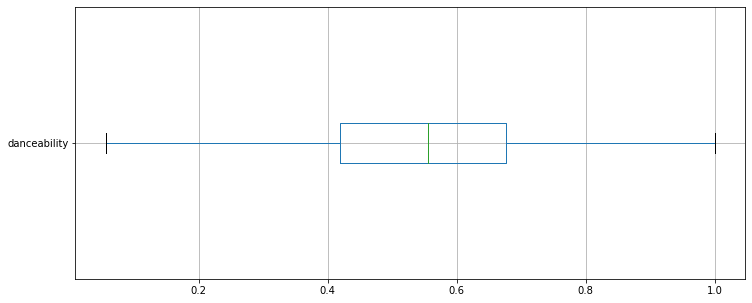

In [25]:
data.boxplot(column = ['danceability'], vert = False, figsize = (12,5), showfliers = False)

obtaining the most danceable songs

In [26]:
mostdancable=data.sort_values(by = "danceability", ascending = False).head(15)
mostdancable

acousticness                                            artists  \
13734       0.075803                                       ['Tone-Loc']   
54525       0.000629  ['Spooner Street', 'Rio Dela Duna', 'Leonardo ...   
141441      0.145582                   ['Pitbull', 'Trina', 'Young Bo']   
37455       0.002982                                       ['Tone-Loc']   
92739       0.124498                                    ['Nilla Pizzi']   
171536      0.022590                    ['Dan McKie', 'Zigmund Slezak']   
173266      0.002771                                  ['Michael Beyer']   
154230      0.030120                                      ['Daft Punk']   
13910       0.027108                                    ['Vanilla Ice']   
39276       0.673695                                       ['347aidan']   
51218       0.284137                    ['The Jacksons', 'Mick Jagger']   
17628       0.002510                                    ['Vanilla Ice']   
152648      0.024398                                  ['Sir Mix-A-Lot']   
168126      0.485944                                      ['Andrew E.']   
73439       0.001265                                      ['DJ Casper']   

        danceability  duration_ms  energy  explicit                      id  \
13734       1.000000     0.045604   0.633       0.0  5YIF6HSOtHN9HdcE5IPzMe   
54525       0.998988     0.066943   0.649       0.0  5GFwJHucflHj46Hwet6qvc   
141441      0.997976     0.042137   0.597       1.0  1MgM0WDaoQ2A3bnIQTR6ty   
37455       0.996964     0.045849   0.914       0.0  2ui62KKhQgwsUF8afLpyXZ   
92739       0.996964     0.038753   0.522       0.0  2ppnJ8Wz2US6hbHGX61zy4   
171536      0.996964     0.077824   0.725       0.0  0SjbmPZN8qUax64tIGod3G   
173266      0.993927     0.066574   0.868       0.0  1vuhfuHWiBTQTvda2cr3Iw   
154230      0.991903     0.031604   0.486       0.0  4ZdjCuiWBv2weLftWPJ72c   
13910       0.991903     0.049974   0.535       0.0  11d9oUiwHuYt216EFA2tiz   
39276       0.991903     0.032850   0.413       1.0  6Pgmqg15yVexuOgtzuxwoX   
51218       0.991903     0.049887   0.846       0.0  1sLTxLJzyoBJiPzv420KAx   
17628       0.990891     0.046787   0.792       0.0  3XVozq1aeqsJwpXrEZrDJ9   
152648      0.990891     0.047337   0.384       0.0  0sNoN6hL6G4SgveTuM5fWL   
168126      0.989879     0.040182   0.837       0.0  7MwGWKdDGeop9D8bZN37hc   
73439       0.989879     0.071729   0.695       0.0  3Xv5C02Wxlek0dmrYAM5A8   

        instrumentalness       key  liveness  loudness  mode  \
13734           0.000002  0.454545    0.0668  0.704534   0.0   
54525           0.379000  0.818182    0.0686  0.834281   1.0   
141441          0.000002  0.727273    0.1970  0.832997   1.0   
37455           0.000188  0.000000    0.0408  0.817665   1.0   
92739           0.902000  0.727273    0.1320  0.778968   1.0   
171536          0.307000  0.000000    0.0687  0.881998   1.0   
173266          0.210000  0.818182    0.1250  0.848923   1.0   
154230          0.823000  0.545455    0.0995  0.825151   1.0   
13910           0.000002  0.181818    0.1040  0.688513   1.0   
39276           0.000080  0.727273    0.1700  0.766549   0.0   
51218           0.149000  0.727273    0.0520  0.819106   0.0   
17628           0.000008  0.181818    0.1020  0.896030   1.0   
152648          0.001740  1.000000    0.1790  0.722324   0.0   
168126          0.000000  0.636364    0.7010  0.786062   1.0   
73439           0.000050  0.545455    0.2840  0.849644   1.0   

                                                   name  popularity  \
13734                                 Funky Cold Medina        0.56   
54525                     Cool - Leonardo La Mark Remix        0.00   
141441                                          Go Girl        0.52   
37455                   Funky Cold Medina - Re-Recorded        0.07   
92739                          O mama mama - Remix 2014        0.00   
171536                   Dddance - Zigmund Slezak Remix        0.00   
173266              

dropping columns and setting a new index

In [27]:
newmostdanceable = mostdancable.drop(columns=['id', 'acousticness', 'duration_ms', 'energy','explicit','instrumentalness','key','liveness',
                                             'loudness','mode','speechiness','tempo','valence','cat'])

In [28]:
newmostdanceable.head(3)

artists  danceability  \
13734                                        ['Tone-Loc']      1.000000   
54525   ['Spooner Street', 'Rio Dela Duna', 'Leonardo ...      0.998988   
141441                   ['Pitbull', 'Trina', 'Young Bo']      0.997976   

                                 name  popularity release_date      year  
13734               Funky Cold Medina        0.56   1989-01-01  0.683168  
54525   Cool - Leonardo La Mark Remix        0.00   2021-01-15  1.000000  
141441                        Go Girl        0.52   2012-05-08  0.910891

In [29]:
newmostdanceable=newmostdanceable.set_index('name')
newmostdanceable

artists  \
name                                                                                                 
Funky Cold Medina                                                                     ['Tone-Loc']   
Cool - Leonardo La Mark Remix                    ['Spooner Street', 'Rio Dela Duna', 'Leonardo ...   
Go Girl                                                           ['Pitbull', 'Trina', 'Young Bo']   
Funky Cold Medina - Re-Recorded                                                       ['Tone-Loc']   
O mama mama - Remix 2014                                                           ['Nilla Pizzi']   
Dddance - Zigmund Slezak Remix                                     ['Dan McKie', 'Zigmund Slezak']   
Stuck in Your Brain                                                              ['Michael Beyer']   
Teachers                                                                             ['Daft Punk']   
Ice Ice Baby                                                                       ['Vanilla Ice']   
Dancing in My Room                                                                    ['347aidan']   
State of Shock                                                     ['The Jacksons', 'Mick Jagger']   
Ice Ice Baby                                                                       ['Vanilla Ice']   
Beepers                                                                          ['Sir Mix-A-Lot']   
Binibi Rocha - Live                                                                  ['Andrew E.']   
Cha Cha Slide - Original Live Platinum Band Mix                                      ['DJ Casper']   

                                                 danceability  popularity  \
name                                                                        
Funky Cold Medina                                    1.000000        0.56   
Cool - Leonardo La Mark Remix                        0.998988        0.00   
Go Girl                                              0.997976        0.52   
Funky Cold Medina - Re-Recorded                      0.996964        0.07   
O mama mama - Remix 2014                             0.996964        0.00   
Dddance - Zigmund Slezak Remix                       0.996964        0.00   
Stuck in Your Brain                                  0.993927        0.00   
Teachers                                             0.991903        0.41   
Ice Ice Baby                                         0.991903        0.61   
Dancing in My Room                                   0.991903        0.84   
State of Shock                                       0.991903        0.43   
Ice Ice Baby                                         0.990891        0.70   
Beepers                                              0.990891        0.25   
Binibi Rocha - Live                                  0.989879        0.41   
Cha Cha Slide - Original Live Platinum Band Mix      0.989879        0.53   

                                                release_date      year  
name                                                                    
Funky Cold Medina                                 1989-01-01  0.683168  
Cool - Leonardo La Mark Remix                     2021-01-15  1.000000  
Go Girl                                           2012-05-08  0.910891  
Funky Cold Medina - Re-Recorded                   2010-12-21  0.891089  
O mama mama - Remix 2014                          2014-11-27  0.930693  
Dddance - Zigmund Slezak Remix                    2013-01-07  0.920792  
Stuck in Your Brain                               2016-07-07  0.950495  
Teachers                                          1997-01-16  0.762376  
Ice Ice Baby                                      1990-01-01  0.693069  
Dancing in My Room                                2020-10-26  0.990099  
State of Shock                                    1984-10-30  0.633663  
Ice Ice Baby                                      2008-11-04  0.871287  
Beepers                 

vizualing the most dancable songs as a bar chart

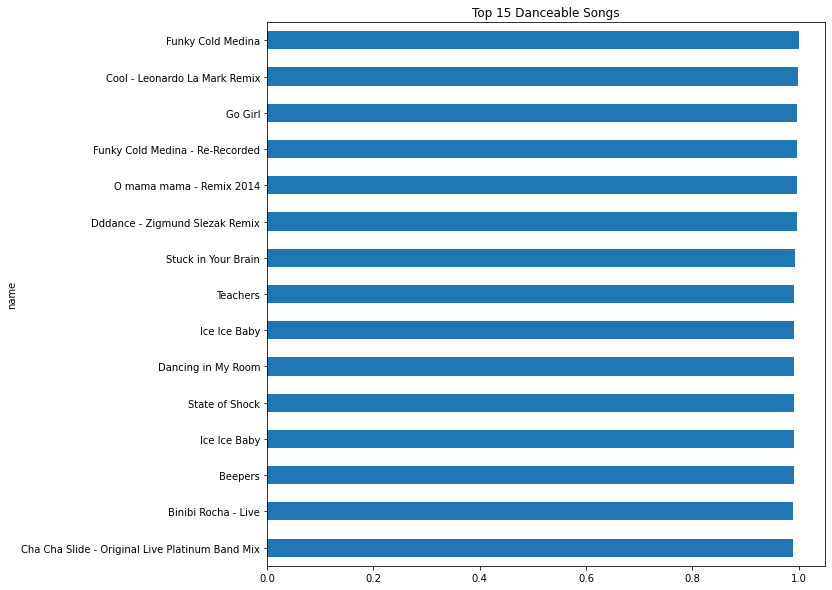

In [30]:
newmostdanceable['danceability'].plot.barh(title='Top 15 Danceable Songs', figsize=(10,10)).invert_yaxis()

In [31]:
newmostdanceable.to_csv('flist.csv')

looking how the most danceable songs correlate with popularity

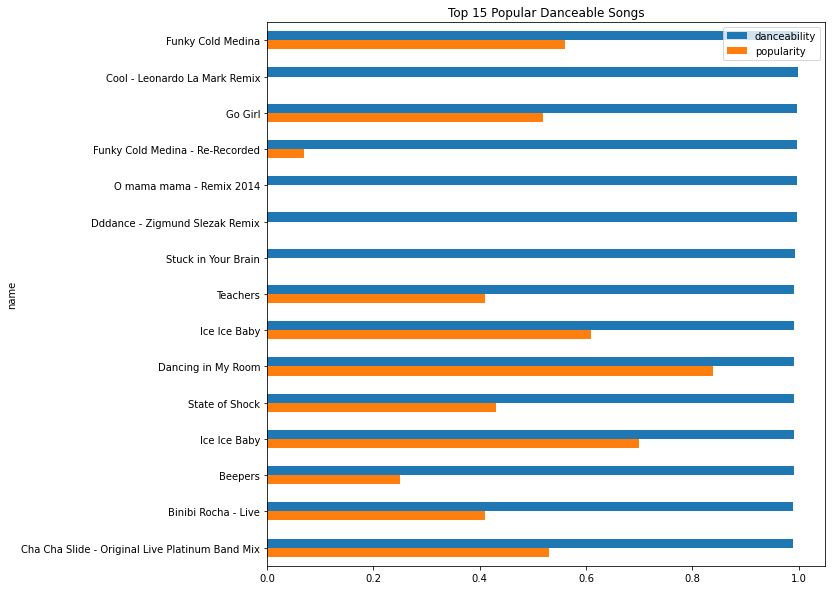

In [32]:
newmostdanceable[['danceability', 'popularity']].plot.barh(title='Top 15 Popular Danceable Songs', figsize=(10,10)).invert_yaxis()

<AxesSubplot:>

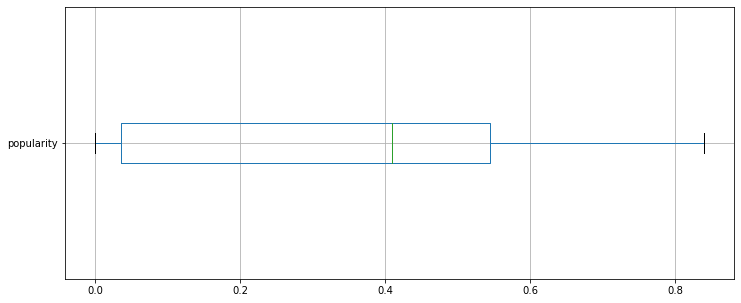

In [33]:
newmostdanceable.boxplot(column = ['popularity'], vert = False, figsize = (12,5), showfliers = False)

In [34]:
newmostdanceable['popularity'].describe().map('{:,.0f}'.format)

count    15
mean      0
std       0
min       0
25%       0
50%       0
75%       1
max       1
Name: popularity, dtype: object

an analysis of the entire data set and its corellations with populairty and danceability

<AxesSubplot:xlabel='popularity', ylabel='danceability'>

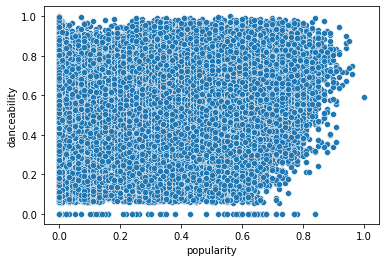

In [47]:
sns.scatterplot(data = newviz_data, x = "popularity", y = "danceability")

an overview of the most danceable songs relative to their popularity

<AxesSubplot:xlabel='danceability', ylabel='popularity'>

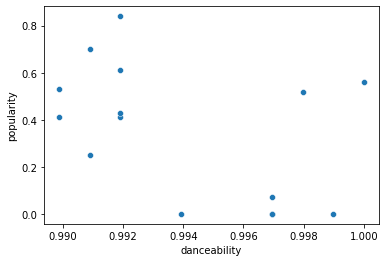

In [43]:
sns.scatterplot(data = newmostdanceable, x = "danceability", y = "popularity")